data visualization
statistical graphing

In [1]:
#Task 1
#import pandas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
import os
import sklearn
from sklearn.model_selection import train_test_split


##import inforamtion from cleaned data from previous Capstone 2
CCLoan = pd.read_csv(r'.\DataCapstoneProject2\ccFraudDefault\Cleaned_app_data_ver3.csv',header=0)

In [2]:
#Task 2.0
CCLoan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CLIENTID                     307511 non-null  int64  
 1   LATE_PAYMENT                 307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [3]:
#Task 2.0.1 
aaa=CCLoan.isna().sum()
aaa.sort_values(ascending = False,)

CLIENTID                       0
REG_CITY_NOT_LIVE_CITY         0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_WORK_CITY         0
LATE_PAYMENT                   0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
HOUSETYPE_MODE                 0
WALLSMATERIAL_MODE             0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
DAYS_LAST_PHONE_CHANGE         0
AMT_REQ_CREDIT_BUREAU_QRT      0
FLAG_PHONE                     0
FLAG_CONT_MOBILE               0
FLAG_WORK_PHONE                0
FLAG_EMP_PHONE                 0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_C

In [4]:
#Task 2.1
#describe the cleaned data

CCLoan.describe()

,CLIENTID,LATE_PAYMENT,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27107.516051,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.078173,0.230454,0.179555,1.417523,0.142944,1.400626,0.099717,-962.855657,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14494.443757,3.692794e+05,0.013831,4363.988632,141275.766519,...,0.268444,0.421124,0.383817,2.398395,0.446033,2.377224,0.361735,826.808966,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,0.000000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,0.000000,261.000000,25.000000


In [5]:
CCLoan.head(10)

,CLIENTID,LATE_PAYMENT,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Business Entity Type 3,block of flats,"Stone, brick",2.0,2.0,2.0,2.0,-1134.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,School,block of flats,Block,1.0,0.0,1.0,0.0,-828.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Government,unknown,unknown,0.0,0.0,0.0,0.0,-815.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Business Entity Type 3,unknown,unknown,2.0,0.0,2.0,0.0,-617.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Religion,unknown,unknown,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,Other,unknown,unknown,0.0,0.0,0.0,0.0,-2536.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,Business Entity Type 3,unknown,unknown,1.0,0.0,1.0,0.0,-1562.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,Other,unknown,unknown,2.0,0.0,2.0,0.0,-1070.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,XNA,unknown,unknown,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,Electricity,unknown,unknown,2.0,0.0,2.0,0.0,-1673.0,0.0,0.0


In [6]:
#Task 2.5
#split training and test set
#split payment based on percentage of stratify=CCLoan['LATE_PAYMENT']

#train, test = train_test_split(CCLoan, stratify=CCLoan['LATE_PAYMENT'], test_size=0.25)
#remove train and split and data and will be placed into end of features


In [7]:
#Task 2.6
# save train and test set
# drop index so i dont need to have later
#train.to_csv(r'.\DataCapstoneProject2\ccFraudDefault\train.csv',index = 0)
#test.to_csv(r'.\DataCapstoneProject2\ccFraudDefault\test.csv',index = 0 )
#removed from training and will create after pre-processing

After data was clean we only have 50 columns to graph and find patterns in


In [8]:
#Task 3.0
#take a look what is 25%, 50% and 75% of credit of loan
# median loan is 513,531, mean is 599,026
np.percentile(CCLoan['AMT_CREDIT'],[25,50,75])

array([270000., 513531., 808650.])

In [9]:
#Task 3.3
#View data of if women have more late payment vs men.  There is 2:1 ratio of loan borrower are women
#CCLoan_sub = CCLoan[['CLIENTID','LATE_PAYMENT','CODE_GENDER','NAME_CONTRACT_TYPE','AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL']]
M_CCLoan = CCLoan[CCLoan['CODE_GENDER']=='M']
F_CCLoan = CCLoan[CCLoan['CODE_GENDER']=='F']

In [10]:
#Task 3.3.2
#M_CCLoan total male with loan is 105059
#LatePayment of men.  the rough percentage is 10% late from men
men=M_CCLoan[M_CCLoan['LATE_PAYMENT']==1]
print (men['LATE_PAYMENT'].count())

10655


In [11]:
#Task 3.3.2.1
#Get % of men are late 
print('Late Payment for Men '+ str(round((men['LATE_PAYMENT'].count())/M_CCLoan['LATE_PAYMENT'].count(),4)*100)+'%')

Late Payment for Men 10.14%


In [12]:
#Task 3.3.2.2
M_CCLoan['LATE_PAYMENT'].count()

105059

In [13]:
#Task 3.3.3
#F_CCLoan total of femal with loan is 202452 
#LatePayment of female 14170. the rough percentage is women only late by 7% of time
female=F_CCLoan[F_CCLoan['LATE_PAYMENT']==1]
print (female['LATE_PAYMENT'].count())



14170


In [14]:
#Task 3.3.3.1  # correct demonator
#Get % of female are late 
print('Late Payment for Women {:.4f}'.format(round((female['LATE_PAYMENT'].count())/F_CCLoan['LATE_PAYMENT'].count(),4)*100)+'%')

Late Payment for Women 7.0000%


In [15]:
len(F_CCLoan.value_counts())

202452

<AxesSubplot:>

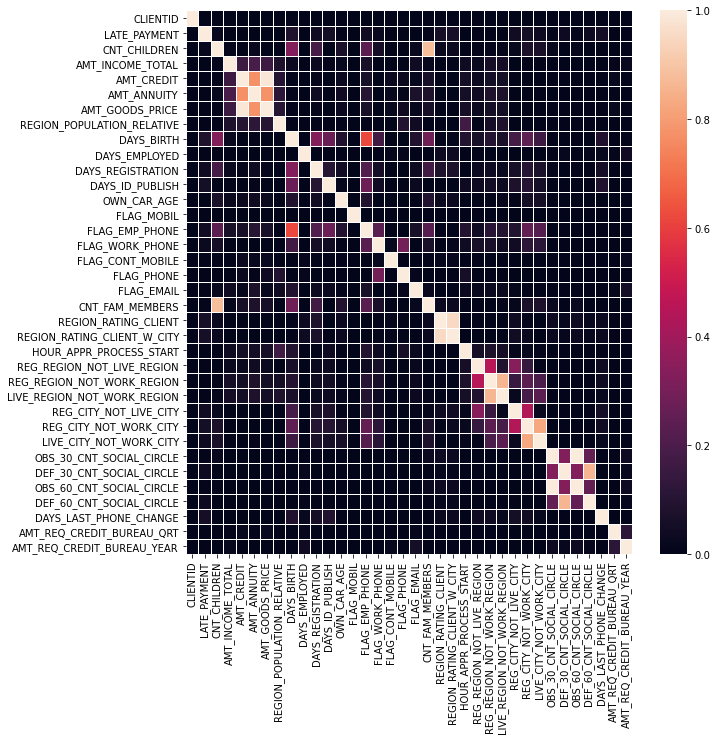

In [16]:
#Task 5.0
#test data to see correlation mapping
#Heat map with columns that are floats or int.  It will not work with str.
#adjust the scale so i can see anything that has correation greater than 0.  
#Previous chart with -1 to 1 was difficult to distinguest correlation

CCLoan_corr=CCLoan.corr()
fig,ax  =plt.subplots(figsize = (10,10))
sns.heatmap(CCLoan_corr, linewidth=.5,ax=ax, vmin=0,vmax=1)

<AxesSubplot:>

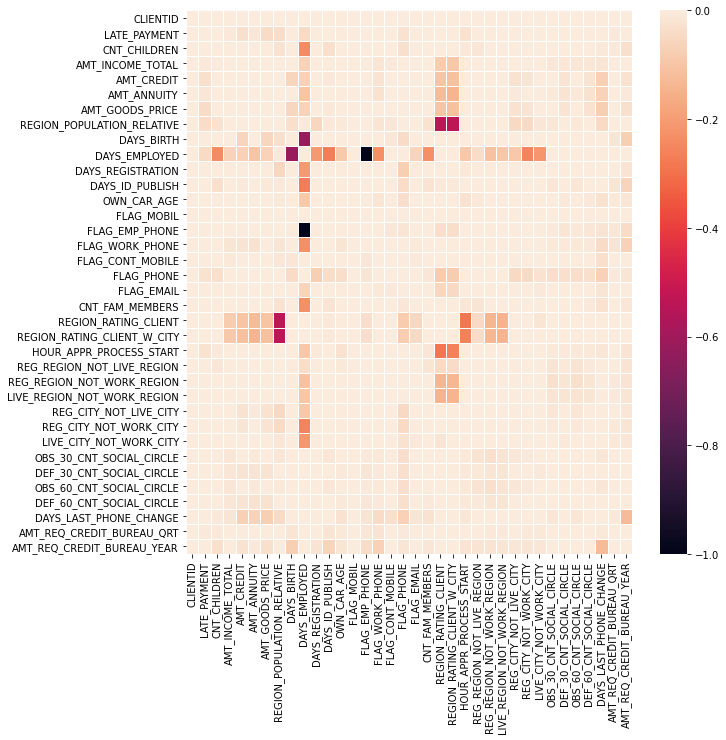

In [17]:
#Task 5.1
#test data to see correlation mapping
#Heat map with columns that are floats or int.  It will not work with str.
#adjust the scale so i can see anything that has correation greater than 0.  
#Previous chart with -1 to 1 was difficult to distinguest correlation

CCLoan_corr=CCLoan.corr()
fig,ax  =plt.subplots(figsize = (10,10))
sns.heatmap(CCLoan_corr, linewidth=.5,ax=ax, vmin=-1,vmax=0)

Text(0.5, 0, 'Total Credit')

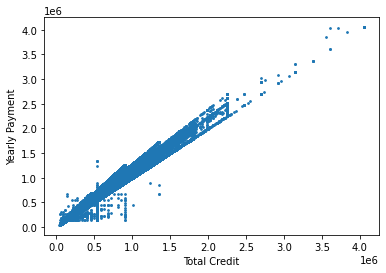

In [18]:
#Task 5.1
df = CCLoan[['AMT_GOODS_PRICE','AMT_CREDIT','CODE_GENDER']]
ax.grid=True
ax=df.plot.scatter(x='AMT_GOODS_PRICE',y='AMT_CREDIT',s =3,cmap='coolwarm')
plt.ylabel('Yearly Payment')
plt.xlabel('Total Credit')



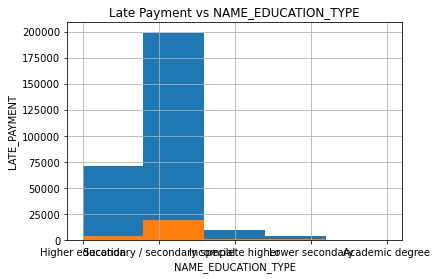

In [19]:
#Task 5.2
_=CCLoan.groupby('LATE_PAYMENT')['NAME_EDUCATION_TYPE'].hist(bins =5)
_=plt.xlabel('NAME_EDUCATION_TYPE')
_=plt.ylabel('LATE_PAYMENT')
_=plt.title("Late Payment vs NAME_EDUCATION_TYPE")

plt.show()

In [20]:
#Task 5.3
CCLoan_new=CCLoan.groupby('LATE_PAYMENT')['NAME_EDUCATION_TYPE'].value_counts().unstack(0)
CCLoan_new/CCLoan_new.sum()

LATE_PAYMENT,0,1
NAME_EDUCATION_TYPE,,
Academic degree,0.000570,0.000121
Higher education,0.250646,0.161490
Incomplete higher,0.033270,0.035126
Lower secondary,0.012024,0.016798
Secondary / secondary special,0.703491,0.786465


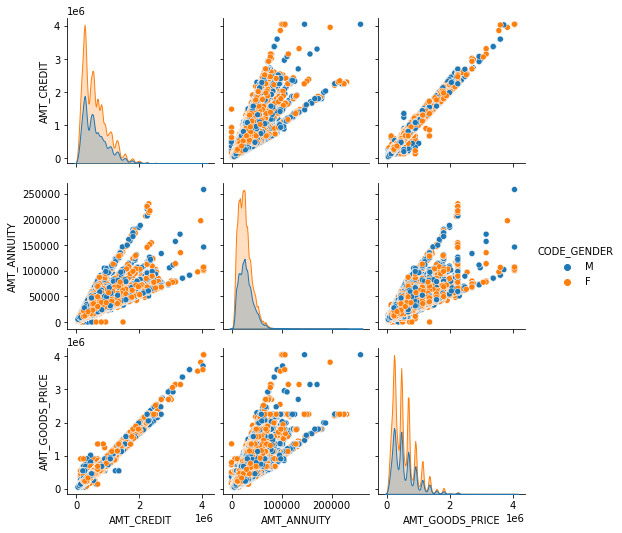

In [21]:
#Task 5.4 
df3_5 = CCLoan[['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CODE_GENDER']]
sns.pairplot(df3_5, hue='CODE_GENDER')


In [22]:
#Task 5.4.1
CCLoan_new=CCLoan.groupby('LATE_PAYMENT')['NAME_FAMILY_STATUS'].value_counts().unstack(0)
CCLoan_new/CCLoan_new.sum()

LATE_PAYMENT,0,1
NAME_FAMILY_STATUS,,
Civil marriage,0.094854,0.119275
Married,0.642345,0.598187
Separated,0.064206,0.065257
Single / not married,0.144991,0.179537
Unknown,0.000007,NaN
Widow,0.053597,0.037744


#Task 5.4.2 (duplicate)

CCLoan_new1=CCLoan.groupby('LATE_PAYMENT')['NAME_FAMILY_STATUS'].value_counts().unstack(0)
CCLoan_new1/CCLoan_new1.sum()


#Task 5.4.3
#space holder change to markdown for now.  I will clean up after i get this completed


#Task 5.4.4
#space holder change to markdown for now.  I will clean up after i get this completed



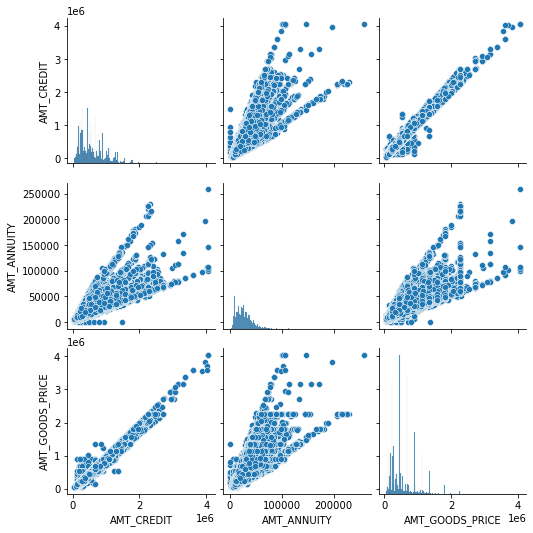

In [23]:
#Task 5.5
df3 = CCLoan[['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]
sns.pairplot(df3)


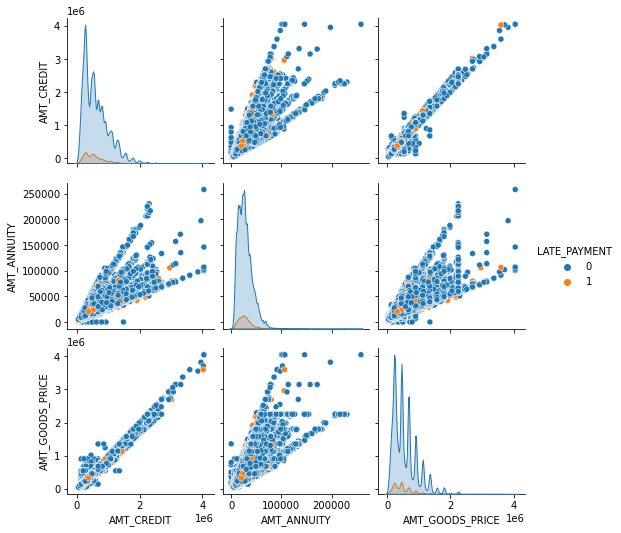

In [24]:
#Task 5.5.1
df5=CCLoan[['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','LATE_PAYMENT']]
sns.pairplot(df5, hue='LATE_PAYMENT')

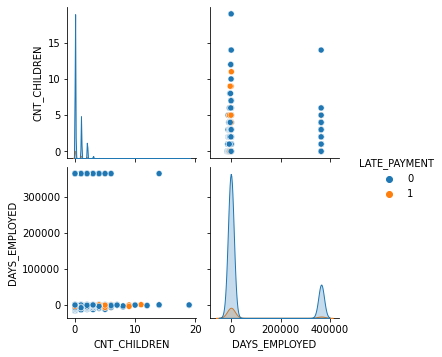

In [25]:
#Task 5.6
df4 = CCLoan[['NAME_FAMILY_STATUS','FLAG_OWN_CAR','CNT_CHILDREN','DAYS_EMPLOYED','LATE_PAYMENT']]
sns.pairplot(df4, hue='LATE_PAYMENT')

Per looking at the days employeed and definition from data dictionary.  I have to drop this column as the data is not untrust worth.  The data dictionary says "How many days before the application the person started current employment"  There is 55374 or ~18% that has the wrong data.  I should drop this column.

Looking at this data lead me to look at CCLoan['DAYS_BIRTH'].  The data dictionary description is "Client's age in days at the time of application", I had data that was negative and didnt make sense.  I am dropping this feature too.  

now I am thinking should i set those column to 0.  Can we discuss it

In [26]:
#Task 5.6.1
import heapq
nlist=5
max_days_employed = heapq.nlargest(nlist,CCLoan['DAYS_EMPLOYED'].unique())
print (max_days_employed)

[365243, 0, -1, -2, -3]


In [27]:
#Task 5.6.2
#count of days employeed 55374.  There is total 307511 rows from previous Data Wrangling.
#i will be dropping this feature and 
CCLoanDays=CCLoan[CCLoan['DAYS_EMPLOYED']==365243]
print(CCLoanDays['DAYS_EMPLOYED'].count())
print(CCLoanDays['DAYS_EMPLOYED'].count()/307511)

55374
0.18007160719453938


In [28]:
#Task 5.6.3
CCLoan['DAYS_BIRTH'].unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061], dtype=int64)

In [29]:
#Task 5.6.4
#drop the 2 column that had strange data

CCLoan.drop(CCLoan[['DAYS_BIRTH','DAYS_EMPLOYED']].columns,axis=1,inplace=True)

In [30]:
#Task 5.6.5

CCLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CLIENTID                     307511 non-null  int64  
 1   LATE_PAYMENT                 307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [31]:
#Task 5.7
#because of the dropping of columns i need to recreate a new set of data for train and test
# save train and test set
# drop index so i dont need to have later
#redo train split
#train.to_csv(r'.\DataCapstoneProject2\ccFraudDefault\trainfinal.csv',index = 0)
#test.to_csv(r'.\DataCapstoneProject2\ccFraudDefault\testfinal.csv',index = 0 )

#remove from to create train test data

In [32]:
#Task 5.8.1
CCLoan_new=CCLoan.groupby('LATE_PAYMENT')['NAME_FAMILY_STATUS'].value_counts().unstack(0)
CCLoan_new/CCLoan_new.sum()

LATE_PAYMENT,0,1
NAME_FAMILY_STATUS,,
Civil marriage,0.094854,0.119275
Married,0.642345,0.598187
Separated,0.064206,0.065257
Single / not married,0.144991,0.179537
Unknown,0.000007,NaN
Widow,0.053597,0.037744


#Task 5.9
# delete because i got rid of 'DAYS_EMPLOYED'
CCLoan_new=CCLoan.groupby('LATE_PAYMENT')['DAYS_EMPLOYED'].value_counts().unstack(0)
CCLoan_new/CCLoan_new.sum()

In [33]:
#Task 5.10
CCLoan_new=CCLoan.groupby('LATE_PAYMENT')['FLAG_OWN_CAR'].value_counts().unstack(0)
CCLoan_new/CCLoan_new.sum()

LATE_PAYMENT,0,1
FLAG_OWN_CAR,,
N,0.656824,0.694824
Y,0.343176,0.305176


In [34]:
#Task 5.11
CCLoan_new=CCLoan.groupby('LATE_PAYMENT')['CNT_CHILDREN'].value_counts().unstack(0)
CCLoan_new/CCLoan_new.sum()

LATE_PAYMENT,0,1
CNT_CHILDREN,,
0,0.703119,0.669043
1,0.196915,0.219698
2,0.086371,0.093978
3,0.011882,0.014421
4,0.001323,0.002216
5,0.000272,0.000282
6,0.000053,0.000242
7,0.000025,NaN
8,0.000007,NaN


#Task 5.12
#space holder change to markdown for now.  I will clean up after i get this completed



matplotlib.pyplot.boxplot(data, notch=None, vert=None, patch_artist=None, widths=None)

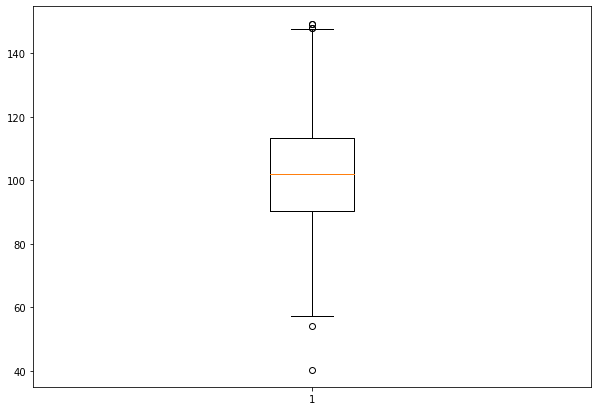

In [35]:
#Task 6.0
#Boxplot 

np.random.seed(10)
data = np.random.normal(100, 20, 200)
fig = plt.figure(figsize =(10, 7))
  
# Creating plot
plt.boxplot(data)
  
# show plot
plt.show()


#Task 6.0.1
#Delete 
plt.figure(figsize = (30,5))
sns.boxplot(x=CCLoan['DAYS_EMPLOYED'],y=CCLoan['LATE_PAYMENT']);
plt.show()

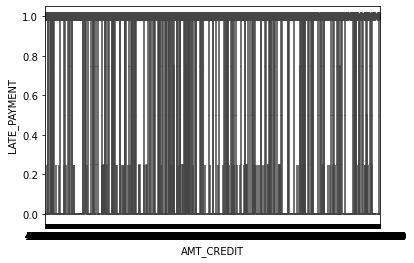

In [36]:
#Task 6.0.2
#Boxplot

sns.boxplot(x=CCLoan['AMT_CREDIT'] ,y=CCLoan['LATE_PAYMENT']);
plt.show()


Box Plot are difficult to decipher so this is not the best use of plots for the same data

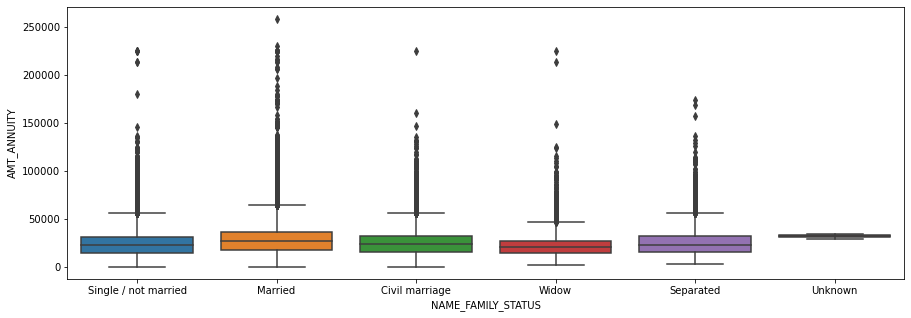

In [37]:
#Task 6.0.3
#Boxplot
plt.figure(figsize = (15,5))
sns.boxplot(x=CCLoan['NAME_FAMILY_STATUS'] ,y=CCLoan['AMT_ANNUITY']);
plt.show()
#'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','LATE_PAYMENT']]

In [38]:
#Task 6.0.3.1

CCLoan.groupby('NAME_FAMILY_STATUS')['AMT_ANNUITY'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_FAMILY_STATUS,,,,,,,,
Civil marriage,29775.0,25131.396423,13324.736987,0.0,15567.750,23080.50,31500.000,225000.0
Married,196432.0,28617.607393,14907.098335,0.0,17694.000,26316.00,36459.000,258025.5
Separated,19770.0,24971.410243,13394.622135,2295.0,15215.625,22758.75,31566.375,173704.5
Single / not married,45444.0,24560.071561,13659.616252,0.0,14611.500,22383.00,31086.000,225000.0
Unknown,2.0,31500.000000,3181.980515,29250.0,30375.000,31500.00,32625.000,33750.0
Widow,16088.0,22147.097961,11946.199010,1980.0,13891.500,20119.50,27105.750,225000.0


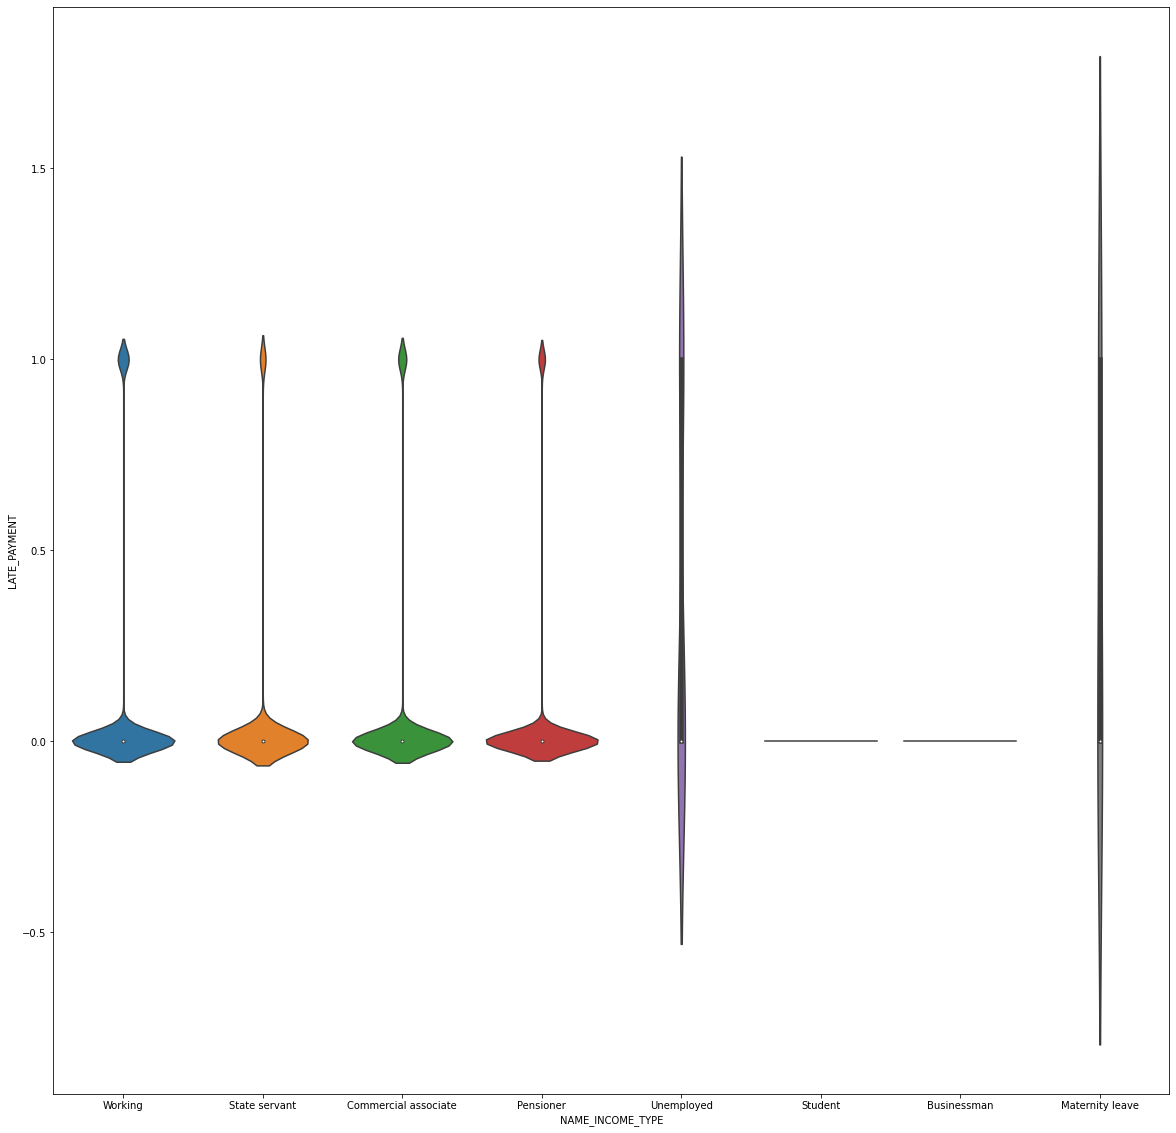

In [39]:
#Task 6.0.4
#Boxplot

#aasize =(20,20)
fig,ax=plt.subplots()
fig.set_size_inches(20,20)
sns.violinplot(y=CCLoan['LATE_PAYMENT'] ,x=CCLoan['NAME_INCOME_TYPE'], ax =ax );
plt.show()

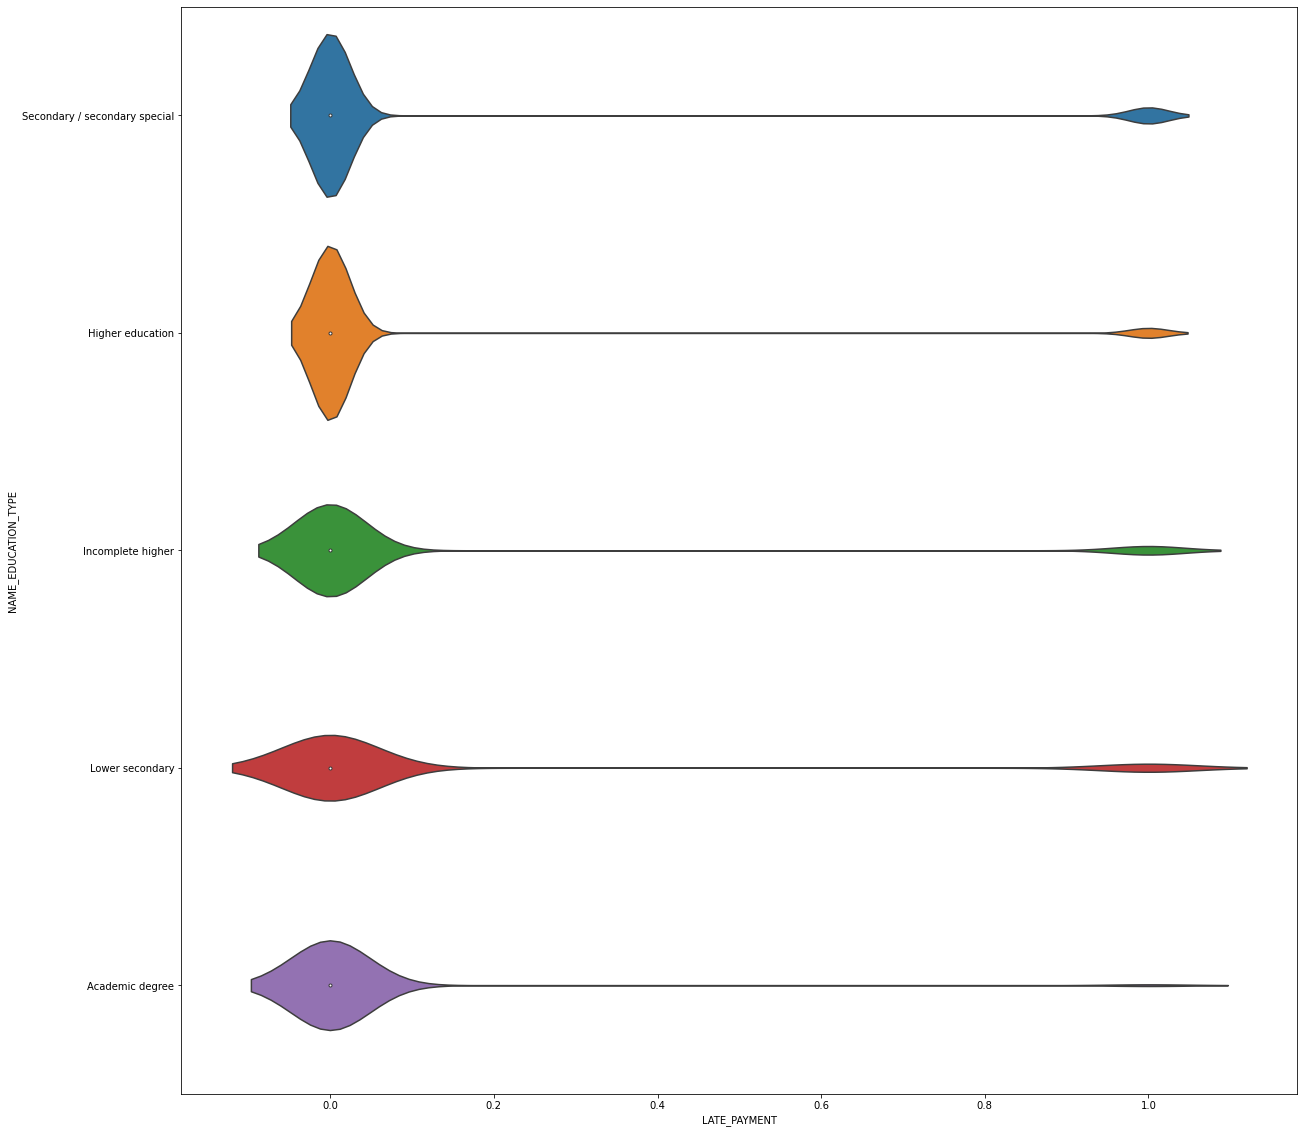

In [40]:
#Task 6.0.5
#Boxplot

#0 none latepayment, 1 latepayment
fig,ax=plt.subplots()
fig.set_size_inches(20,20)
sns.violinplot(y=CCLoan['NAME_EDUCATION_TYPE'] ,x=CCLoan['LATE_PAYMENT'], ax =ax );
plt.show()

Secondary special education seems to have more 'late payment' but a smaller spread of amount.  More people fall into this category of borrowers. There is a vast majority of borrowers fall into this category.

In [41]:
#Task 6.0.5.1

CCLoan.groupby('NAME_EDUCATION_TYPE')['LATE_PAYMENT'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_EDUCATION_TYPE,,,,,,,,
Academic degree,164.0,0.018293,0.134418,0.0,0.0,0.0,0.0,1.0
Higher education,74863.0,0.053551,0.225131,0.0,0.0,0.0,0.0,1.0
Incomplete higher,10277.0,0.084850,0.278671,0.0,0.0,0.0,0.0,1.0
Lower secondary,3816.0,0.109277,0.312027,0.0,0.0,0.0,0.0,1.0
Secondary / secondary special,218391.0,0.089399,0.285320,0.0,0.0,0.0,0.0,1.0


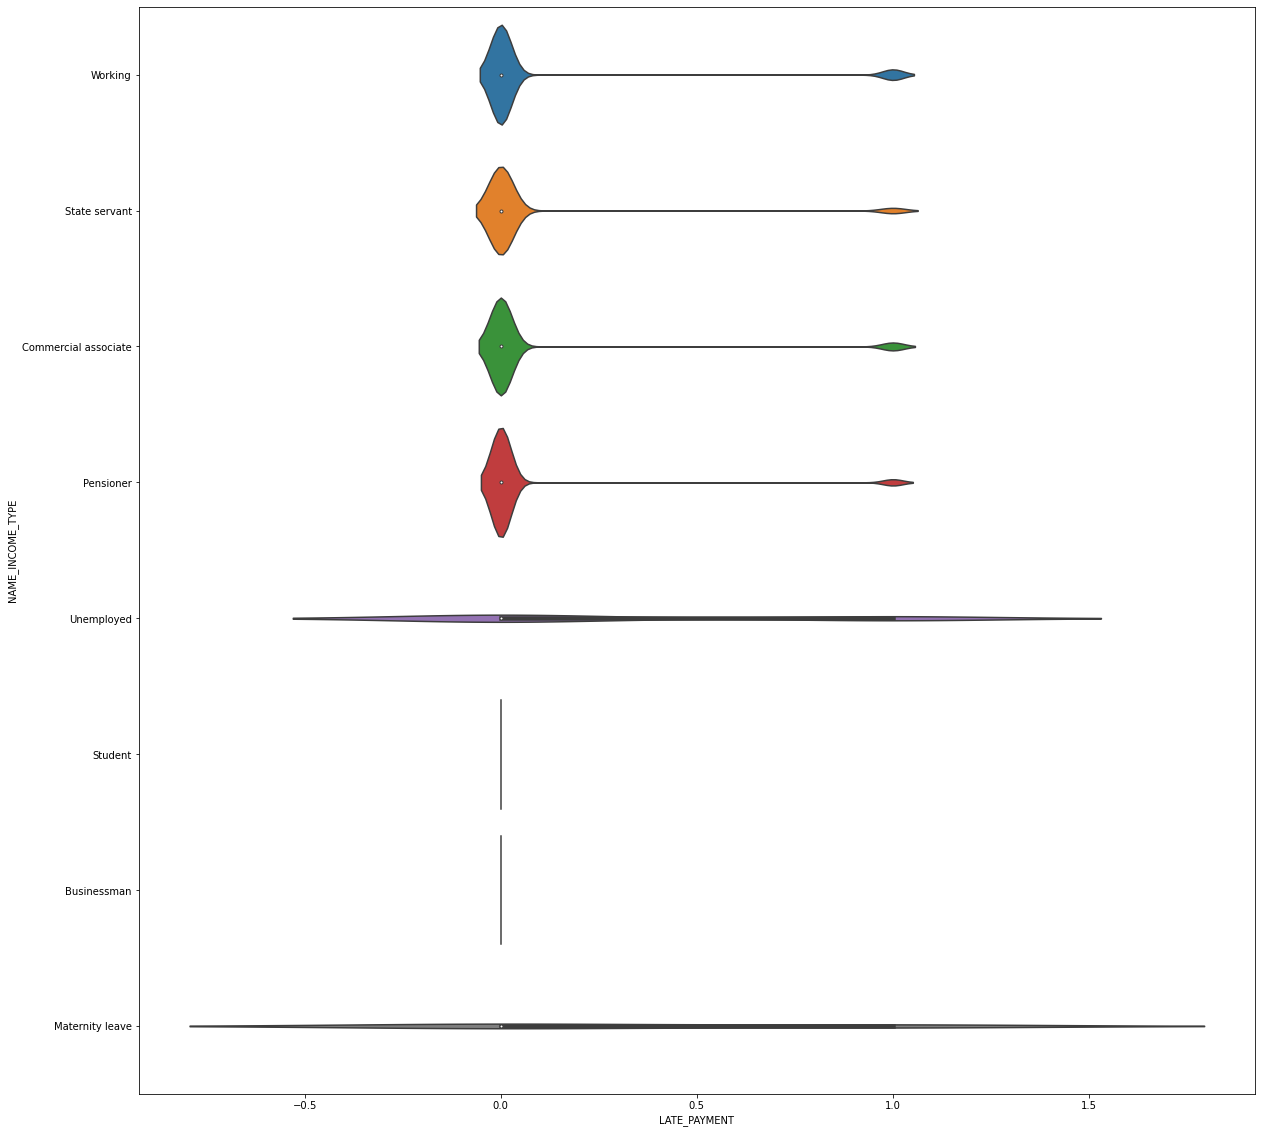

In [42]:
#Task 6.0.6
#Boxplot

#0 none latepayment, 1 latepayment
fig,ax=plt.subplots()
fig.set_size_inches(20,20)
sns.violinplot(y=CCLoan['NAME_INCOME_TYPE'] ,x=CCLoan['LATE_PAYMENT'], ax =ax );
plt.show()

looking at graphy above i can tell that the working class has more late payment than state servant or commercial associate.  Unemployed has 

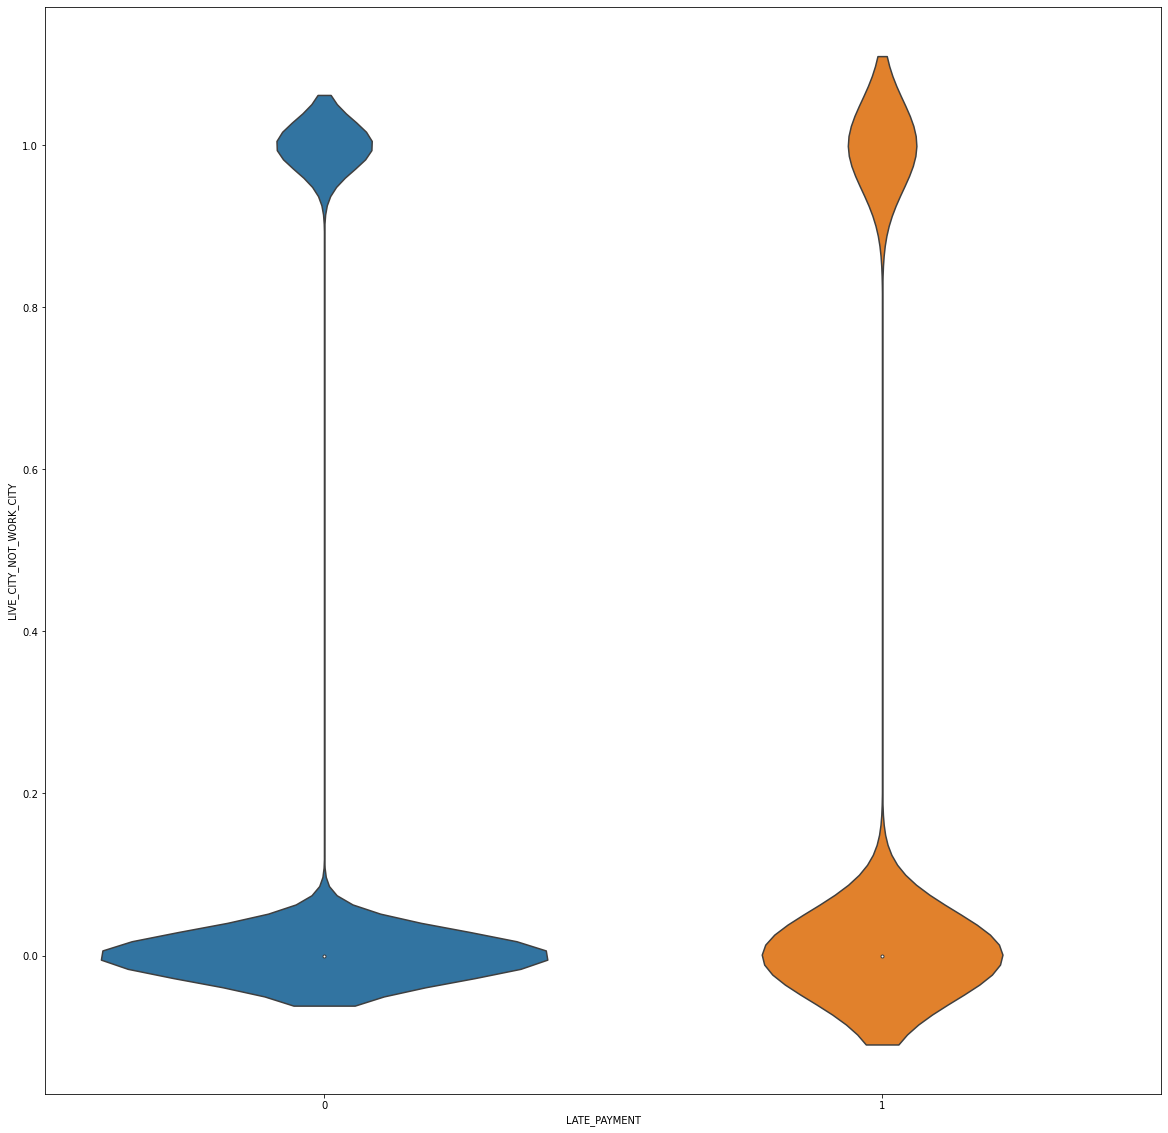

In [43]:
#Task 6.0.7
#Boxplot

#0 none latepayment, 1 latepayment
fig,ax=plt.subplots()
fig.set_size_inches(20,20)
sns.violinplot(y=CCLoan['LIVE_CITY_NOT_WORK_CITY'] ,x=CCLoan['LATE_PAYMENT'], ax =ax );
plt.show()

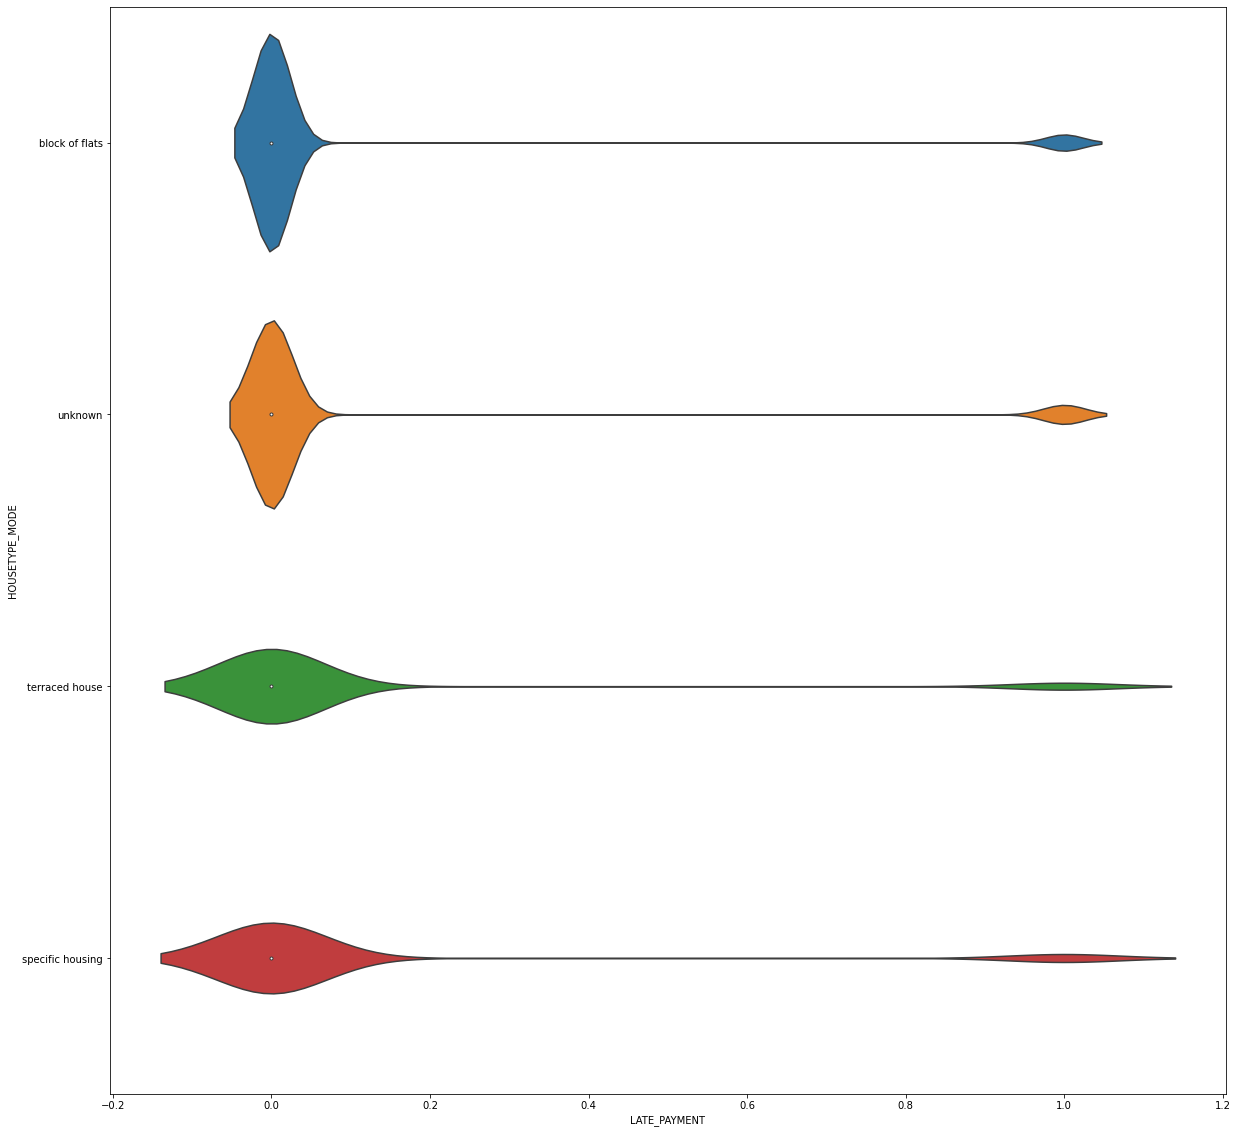

In [44]:
#Task 6.0.8
#Boxplot

#0 none latepayment, 1 latepayment
fig,ax=plt.subplots()
fig.set_size_inches(20,20)
sns.violinplot(y=CCLoan['HOUSETYPE_MODE'] ,x=CCLoan['LATE_PAYMENT'], ax =ax );
plt.show()

In [45]:
#Task 6.1.1
CCLoan_new=CCLoan.groupby('LATE_PAYMENT')['HOUSETYPE_MODE'].value_counts().unstack(0)
CCLoan_new/CCLoan_new.sum() 

#get percentage of people who are late instead divide by row sum(total)

#housetype / total type of house


LATE_PAYMENT,0,1
HOUSETYPE_MODE,,
block of flats,0.495437,0.420947
specific housing,0.004765,0.006123
terraced house,0.003923,0.004149
unknown,0.495875,0.568781


In [46]:
#Task 6.1.2

LatePay= CCLoan.loc[CCLoan['LATE_PAYMENT']==1]
H_Late = CCLoan.loc[CCLoan['HOUSETYPE_MODE']=='block of flats']

LatePay.head(10)


#(housetype late payment / house type  )* 100

,CLIENTID,LATE_PAYMENT,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Business Entity Type 3,block of flats,"Stone, brick",2.0,2.0,2.0,2.0,-1134.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,Business Entity Type 3,block of flats,Wooden,10.0,1.0,10.0,0.0,-161.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,Business Entity Type 3,block of flats,"Stone, brick",0.0,0.0,0.0,0.0,-1075.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,Self-employed,unknown,unknown,1.0,0.0,1.0,0.0,-1480.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,XNA,unknown,unknown,1.0,1.0,1.0,1.0,0.0,0.0,0.0
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,...,Industry: type 4,unknown,unknown,0.0,0.0,0.0,0.0,-591.0,0.0,2.0
110,100130,1,Cash loans,F,N,Y,1,157500.0,723996.0,30802.5,...,Trade: type 2,block of flats,"Stone, brick",0.0,0.0,0.0,0.0,-56.0,0.0,0.0
138,100160,1,Cash loans,M,N,Y,0,292500.0,675000.0,36747.0,...,Business Entity Type 3,unknown,unknown,0.0,0.0,0.0,0.0,-106.0,0.0,0.0
154,100181,1,Cash loans,F,N,Y,0,157500.0,245619.0,12667.5,...,Business Entity Type 3,block of flats,Block,0.0,0.0,0.0,0.0,-216.0,0.0,6.0
163,100192,1,Cash loans,F,N,N,0,111915.0,225000.0,21037.5,...,Trade: type 3,unknown,unknown,0.0,0.0,0.0,0.0,-122.0,0.0,0.0


In [47]:
#Task 6.1.3
H_Late.head(10)

,CLIENTID,LATE_PAYMENT,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Business Entity Type 3,block of flats,"Stone, brick",2.0,2.0,2.0,2.0,-1134.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,School,block of flats,Block,1.0,0.0,1.0,0.0,-828.0,0.0,0.0
12,100016,0,Cash loans,F,N,Y,0,67500.0,80865.0,5881.5,...,Business Entity Type 2,block of flats,unknown,0.0,0.0,0.0,0.0,-2370.0,0.0,0.0
13,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,...,Self-employed,block of flats,Panel,0.0,0.0,0.0,0.0,-4.0,0.0,1.0
14,100018,0,Cash loans,F,N,Y,0,189000.0,773680.5,32778.0,...,Transport: type 2,block of flats,Panel,0.0,0.0,0.0,0.0,-188.0,0.0,0.0
18,100022,0,Revolving loans,F,N,Y,0,112500.0,157500.0,7875.0,...,Housing,block of flats,"Stone, brick",8.0,0.0,8.0,0.0,-239.0,0.0,0.0
20,100024,0,Revolving loans,M,Y,Y,0,135000.0,427500.0,21375.0,...,Self-employed,block of flats,"Stone, brick",0.0,0.0,0.0,0.0,-296.0,0.0,0.0
22,100026,0,Cash loans,F,N,N,1,450000.0,497520.0,32521.5,...,Self-employed,block of flats,Panel,0.0,0.0,0.0,0.0,-468.0,0.0,5.0
23,100027,0,Cash loans,F,N,Y,0,83250.0,239850.0,23850.0,...,XNA,block of flats,Mixed,0.0,0.0,0.0,0.0,-795.0,0.0,3.0
24,100029,0,Cash loans,M,Y,N,2,135000.0,247500.0,12703.5,...,Business Entity Type 3,block of flats,Panel,1.0,1.0,1.0,0.0,-4.0,0.0,0.0


In [48]:
#Task 6.1.4

L_H_Late=CCLoan.loc[(CCLoan['LATE_PAYMENT']==1) & (CCLoan['HOUSETYPE_MODE']=='block of flats')]
print('Total % of late payment who lives in a flat '+ str((L_H_Late['LATE_PAYMENT'].count()/H_Late['HOUSETYPE_MODE'].count())*100))

Total % of late payment who lives in a flat 6.943383188374982


Hypothesis Testing

In [49]:
#Task 7.0.1
#Hypothesis testing
#late payment (male vs female) flag own car
from scipy.stats import ttest_ind

M_CCLoanmean=M_CCLoan['LATE_PAYMENT'].mean()

F_CCLoanmean=F_CCLoan['LATE_PAYMENT'].mean()


In [50]:
#Task 7.0.2
M_CCLoanmean

0.1014192025433328

In [51]:
#Task 7.0.3
F_CCLoanmean

0.06999189931440539

In [52]:
#Task 7.0.4  observed value
diff= (M_CCLoanmean - F_CCLoanmean)
print(diff)

0.03142730322892741


null difference in the average late payment between male and female

There is significant difference between the average payment with male and female.  3% is that significant 



In [53]:
#Task 7.0.7
#permutation test with apps project permutation test
#using M = males, M_CCLoanmean is mean
#using F= female, F_CCLoanmean is mean



# make an empty list 
difference = []


for i in range(10000):
    CCLoan['Permutation1'] = np.random.permutation(CCLoan['LATE_PAYMENT'])
    a_rating = CCLoan['Permutation1'].groupby(CCLoan['CODE_GENDER']).describe()
    a_rating = pd.DataFrame(a_rating)
    difference.append((a_rating.loc['F','mean']-a_rating.loc['M','mean']))

In [54]:
#Task 7.0.8  -  how many value greater than different
difference

[0.0007270741349552912,
 -0.0014126955817059805,
 0.0016379220548854156,
 -0.0004151002408301213,
 -0.00012594217101102867,
 0.001363221888557281,
 0.00030779493371761724,
 0.0007704478454281516,
 -0.0018464326864345987,
 0.00010538428484424545,
 -0.0011813691258507064,
 -8.256846053815436e-05,
 0.0007993636524100539,
 0.0006403267140095564,
 -0.00022714749544770763,
 0.0002355054162628406,
 -0.0007476320211220744,
 0.0006403267140095564,
 -5.365265355625204e-05,
 -0.0004151002408301213,
 -9.702636402912634e-05,
 -0.0003138949163934285,
 0.0012041849501567836,
 -0.0017307694585069616,
 -0.0007042583106492001,
 -0.0010512479944321113,
 0.0014933430199758763,
 0.00030779493371761724,
 0.0007415320384462354,
 -0.0007187162141401582,
 -0.0019187222038893892,
 -0.0016440220375612546,
 0.000495747679100017,
 -0.00155727461661552,
 -0.0006608846001763397,
 -0.00025606330242962383,
 -0.0025693278609823372,
 -0.0005307634687577584,
 0.00026442122324474293,
 -0.00048738975828489794,
 -0.00144161

In [55]:
#Task 7.0.9 
p_value = (np.array(difference) >= diff).mean()
p_value

0.0

write a conculsion if feature is significant

with the P value on Task 7.0.9 being zero I can reject the null hypothesis.  We accept that gender is a significant feature.


(array([   7.,   55.,  350., 1213., 2397., 2890., 2045.,  822.,  192.,
          29.]),
 array([-0.00407295, -0.00330668, -0.00254041, -0.00177414, -0.00100787,
        -0.00024161,  0.00052466,  0.00129093,  0.0020572 ,  0.00282347,
         0.00358974]),
 <BarContainer object of 10 artists>)

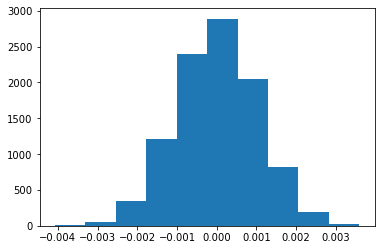

In [56]:
#Task 7.0.10
plt.hist(difference)

In [57]:
#Task 7.1.0
#Hypothesis testing
#late payment (male vs female)flats  vs no flats
# N is 0, Y is 1 
R_CCLoan_N=CCLoan[CCLoan['FLAG_OWN_REALTY']=='N']
R_CCLoan_Y=CCLoan[CCLoan['FLAG_OWN_REALTY']=='Y']
CCLoan.head()

,CLIENTID,LATE_PAYMENT,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUSETYPE_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Permutation1
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,block of flats,"Stone, brick",2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,block of flats,Block,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,unknown,unknown,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,unknown,unknown,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,unknown,unknown,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0


In [58]:
#Task 7.1.1
#validate data is filtered properly
R_CCLoan_N


,CLIENTID,LATE_PAYMENT,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUSETYPE_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Permutation1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,block of flats,Block,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0
13,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,...,block of flats,Panel,0.0,0.0,0.0,0.0,-4.0,0.0,1.0,0
16,100020,0,Cash loans,M,N,N,0,108000.0,509602.5,26149.5,...,unknown,unknown,0.0,0.0,0.0,0.0,-3.0,1.0,0.0,0
22,100026,0,Cash loans,F,N,N,1,450000.0,497520.0,32521.5,...,block of flats,Panel,0.0,0.0,0.0,0.0,-468.0,0.0,5.0,0
24,100029,0,Cash loans,M,Y,N,2,135000.0,247500.0,12703.5,...,block of flats,Panel,1.0,1.0,1.0,0.0,-4.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307494,456238,0,Cash loans,M,Y,N,1,270000.0,479700.0,46858.5,...,unknown,unknown,11.0,0.0,11.0,0.0,-367.0,0.0,1.0,0
307495,456239,0,Cash loans,M,Y,N,0,180000.0,808650.0,23773.5,...,block of flats,Panel,0.0,0.0,0.0,0.0,-2919.0,0.0,1.0,0
307496,456240,0,Revolving loans,F,N,N,0,360000.0,337500.0,16875.0,...,unknown,unknown,0.0,0.0,0.0,0.0,-826.0,0.0,2.0,0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,block of flats,"Stone, brick",0.0,0.0,0.0,0.0,-273.0,0.0,0.0,1


In [59]:
#Task 7.1.2
#validate data is filtered properly
R_CCLoan_Y

,CLIENTID,LATE_PAYMENT,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUSETYPE_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Permutation1
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,block of flats,"Stone, brick",2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,unknown,unknown,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,unknown,unknown,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,unknown,unknown,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,unknown,unknown,0.0,0.0,0.0,0.0,-2536.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,unknown,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,block of flats,Panel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,block of flats,"Stone, brick",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,block of flats,Panel,6.0,0.0,6.0,0.0,-1909.0,0.0,1.0,0


In [60]:
#Task 7.1.3
#pass the mean of own reality and does not own reality
R_CCLoanmean_N= R_CCLoan_N['LATE_PAYMENT'].mean()
R_CCLoanmean_Y= R_CCLoan_Y['LATE_PAYMENT'].mean()

In [61]:
#Task 7.1.4
R_CCLoanmean_N

0.08324929139375152

In [62]:
#Task 7.1.5
R_CCLoanmean_Y

0.07961577407740775

In [63]:
#Task 7.1.6
#% of difference,  the difference is less than 1% so
diff_OwnReality = (R_CCLoanmean_N-R_CCLoanmean_Y)
print (diff_OwnReality)

0.0036335173163437734


apply permutation test because it may be small but it can me almost.  
The difference is small but value may still be significatn

apply permutation test to verify to be sure

In [64]:
#Task 7.1.7
#permutation test with apps project permutation test
#using M = males, M_CCLoanmean is mean
#using F= female, F_CCLoanmean is mean



# make an empty list 
difference = []


for i in range(10000):
    CCLoan['Permutation2'] = np.random.permutation(CCLoan['LATE_PAYMENT'])
    a_rating = CCLoan['Permutation2'].groupby(CCLoan['FLAG_OWN_REALTY']).describe()
    a_rating = pd.DataFrame(a_rating)
    difference.append((a_rating.loc['N','mean']-a_rating.loc['Y','mean']))

In [65]:
#Task 7.1.8
difference

[0.0027918087154207433,
 -0.0008964053358965912,
 -0.0020747973771888667,
 -0.00036077258985466043,
 0.0001595563634432251,
 -0.0019217594497483032,
 0.0010930877208305961,
 0.00041972084009216093,
 -0.0004219877608308692,
 -0.002365569439325907,
 0.0014297711611998137,
 -0.001447341874682595,
 -0.002472695988534307,
 0.00026668291265161126,
 -0.0006209370665035963,
 -0.0005750256882714327,
 -0.0019523670352364075,
 0.0003278980836278339,
 -0.00011591190594976986,
 0.0013073408192473684,
 -0.0006362408592476554,
 0.00014425257069916597,
 -0.0004219877608308692,
 -0.0008811015431525321,
 -0.0009117091286406503,
 -0.002380873232069966,
 0.0009247460006459873,
 -0.0005597218955273875,
 0.00020546774167538862,
 -0.002197227719141298,
 6.77336069788842e-05,
 0.00014425257069916597,
 -0.001156569812545541,
 -0.000513810517295224,
 -0.000697456030223878,
 0.0004044170473481018,
 0.0014297711611998137,
 -0.0003760763825987057,
 -0.0010341394705930956,
 -0.0006515446519917145,
 -0.0009423167141

In [66]:
#Task 7.1.9
p_value = (np.array(difference) >= diff_OwnReality).mean()
p_value

0.0005

(array([  11.,   85.,  515., 1677., 2850., 2687., 1621.,  470.,   74.,
          10.]),
 array([-4.15611319e-03, -3.31746535e-03, -2.47881751e-03, -1.64016966e-03,
        -8.01521821e-04,  3.71260215e-05,  8.75773864e-04,  1.71442171e-03,
         2.55306955e-03,  3.39171739e-03,  4.23036523e-03]),
 <BarContainer object of 10 artists>)

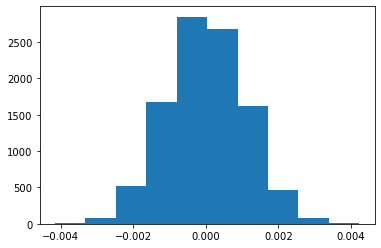

In [67]:
#Task 7.1.10

plt.hist(difference)

with the P value on #Task 7.1.9 being < .01, I can reject the null hypothesis.  I accept that FLAG_OWN_REALTY is a significant feature

In [68]:
#Task 7.2.0
#Hypothesis testing
#late payment (male vs female)flats  vs no flats
#LIVE_CITY_NOT_WORK_CITY vs 'LATE_PAYMENT

City_CCLoan_N=CCLoan[CCLoan['LIVE_CITY_NOT_WORK_CITY']==0]
City_CCLoan_Y=CCLoan[CCLoan['LIVE_CITY_NOT_WORK_CITY']==1]


In [69]:
#Task 7.2.1

City_CCLoanmean_N = City_CCLoan_N['LATE_PAYMENT'].mean()
City_CCLoanmean_Y = City_CCLoan_Y['LATE_PAYMENT'].mean()

In [70]:
#Task 7.2.2
City_CCLoanmean_N

0.0765846466055744

In [71]:
#Task 7.2.3
City_CCLoanmean_Y

0.09966494611971384

In [72]:
#Task 7.2.4
#difference of 2.3%
diff_city= (City_CCLoanmean_N-City_CCLoanmean_Y)
diff_city

-0.023080299514139438

In [73]:
#Task 7.2.5
#permutation test with apps project permutation test
#using 0 = does live , City_CCLoanmean_N is mean
#using 1 = lives in city, City_CCLoanmean_Y is mean



# make an empty list 
difference = []


for i in range(10000):
    CCLoan['Permutation3'] = np.random.permutation(CCLoan['LATE_PAYMENT'])
    a_rating = CCLoan['Permutation3'].groupby(CCLoan['LIVE_CITY_NOT_WORK_CITY']).describe()
    a_rating = pd.DataFrame(a_rating)
    difference.append((a_rating.loc[1,'mean']-a_rating.loc[0,'mean']))

In [74]:
#Task 7.2.6

difference

[-0.00012012491728559394,
 0.0013809491658132583,
 0.0008511583129548472,
 -0.001400452811693445,
 -0.0007382142456204277,
 0.00038759131670373925,
 -0.0020406167588973706,
 -0.00014219953615468572,
 0.0006083375053947404,
 0.00016684512801271034,
 0.0010277552639076648,
 0.00023306898462002734,
 0.00014477050914361855,
 -0.0020406167588973706,
 -0.0012238558607406413,
 0.0010498298827767566,
 -0.0007161396267513082,
 0.0009836060261694535,
 -0.00018634877389289706,
 0.00043174055444192283,
 -0.00029672186823839763,
 0.0018224415431952884,
 -0.00193024366455187,
 -0.0012900797173479445,
 0.002241859301708199,
 -0.00020842339276200272,
 0.0008290836940857416,
 -0.00045124420032210955,
 0.00032136746009642225,
 0.0006745613620020435,
 -0.0006057665324058076,
 0.00012269589027452676,
 0.00016684512801271034,
 -0.0015770497626462626,
 0.00023306898462002734,
 -0.0025924822306249012,
 0.00010062127140540722,
 -0.00020842339276200272,
 -0.0008265127210968226,
 -0.00036294572484571463,
 0.001

In [75]:
#Task 7.2.7
p_value = (np.array(difference) >= diff_city).mean()
p_value

1.0

The P-Value of 7.2.7 is also 0. Therefore it is also a significant feature.  

(array([1.800e+01, 1.610e+02, 7.940e+02, 2.136e+03, 3.037e+03, 2.504e+03,
        1.065e+03, 2.460e+02, 3.600e+01, 3.000e+00]),
 array([-0.00468957, -0.00367414, -0.00265871, -0.00164327, -0.00062784,
         0.00038759,  0.00140302,  0.00241846,  0.00343389,  0.00444932,
         0.00546475]),
 <BarContainer object of 10 artists>)

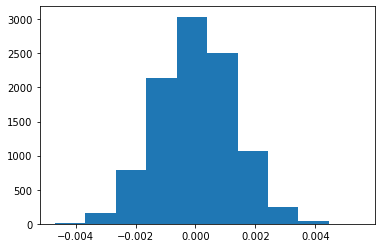

In [76]:
#Task 7.2.8

plt.hist(difference)

I tried mulitiple type of maping.  In the heat map and the color where so similar it was a bit hard to tell the correlation.  Then I tried a box plot and it was difficult to read.  The violin plot started to make me choose some feature to use the hypothesis on.  With that  

I found 3 features that can be considered significant from the hypothesis test.  They are FLAG_OWN_REALTY,  LIVE_CITY_NOT_WORK_CITY, and CODE_GENDER.

I did notice from Task 6.0.5, business men and students do not have any late payments.  It is assume that these 2 classes do not usally take loans that they cant repay.  Student is also a temporay status where it changes with time.   You also see business men and studentshas the smallest amount of loans.

In [77]:
#Task 10
# save the state_summary separately.
# drop index so i dont need to have later
CCLoan.to_csv(r'.\DataCapstoneProject2\ccFraudDefault\Cleaned_EDA_Output.csv',index = 0)